In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import *
import math

Los datos de la vacuna fueron extraídos del repositorio Github del Ministerio de Ciencias de Chile, fue escogido el producto 81 que ordena los datos con el codigo de comuna y la cantidad de vacunados de cierta edad.

In [2]:
url_data = (r'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv')

vacunas = pd.read_csv(url_data)
dfvac = pd.DataFrame(vacunas)
dfvac = dfvac.loc[dfvac['Region'] == 'Metropolitana']

dfvac.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,15,16,17,18,19,...,71,72,73,74,75,76,77,78,79,80
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,17.0,19.0,...,62.0,40.0,44.0,34.0,34.0,37.0,26.0,31.0,22.0,186.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,226.0,274.0,...,595.0,537.0,481.0,429.0,412.0,414.0,368.0,353.0,299.0,2155.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,92.0,73.0,...,193.0,189.0,143.0,149.0,131.0,144.0,125.0,106.0,73.0,711.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,159.0,137.0,...,454.0,472.0,493.0,506.0,379.0,427.0,384.0,375.0,392.0,2362.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,250.0,333.0,...,817.0,778.0,734.0,682.0,716.0,632.0,589.0,557.0,496.0,3073.0


https://www.interviewqs.com/ddi-code-snippets/rows-cols-python

In [3]:
url_data = (r'https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')

idh = pd.read_csv(url_data)
dfidh = pd.DataFrame(idh)

dfidh.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [4]:
url_data = (r'https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv')

pob = pd.read_csv(url_data)
dfpob = pd.DataFrame(pob)
dfpob.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,*,*,54,10
2,1101,*,0,28,*
3,1101,*,7,49,*
4,1101,*,*,26,7


Una vez lista la importación de los datos, se comenzará con la revisión de la integridad de estos.

In [5]:
d1 = dfvac[vacunas.duplicated()].shape
d2 = dfidh[dfidh.duplicated()].shape
d3 = dfpob[dfpob.duplicated()].shape

print(d1)
print(d2)
print(d3)

(0, 71)
(0, 6)
(25911, 5)


<ipython-input-5-bd9937ca663f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d1 = dfvac[vacunas.duplicated()].shape


En los datos de vacuna y de IDH no tenemos datos duplicados, sin embargo, nos podemos dar cuenta que en los datos de la población por comuna existen múltiples entradas para un mismo código de comuna, se asumirá que deben ser sumados por comuna.

https://stackoverflow.com/questions/56759142/pandas-replace-the-asterisk-sign-from-two-columns-in-one-go

In [6]:
dfpob = dfpob.replace({'\*': '0'}, regex=True)
dfpob.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,0,0,54,10
2,1101,0,0,28,0
3,1101,0,7,49,0
4,1101,0,0,26,7


In [7]:
dfpob.dtypes

COMUNA          int64
EDAD_0A5       object
EDAD_6A14      object
EDAD_15A64     object
EDAD_65YMAS    object
dtype: object

https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

In [8]:
dfpob['EDAD_0A5'] = pd.to_numeric(dfpob['EDAD_0A5'])

In [9]:
dfpob[['EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']] = dfpob[['EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']].apply(pd.to_numeric)

In [10]:
list(dfpob.columns.values)

['COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']

In [11]:
dfpob.dtypes

COMUNA         int64
EDAD_0A5       int64
EDAD_6A14      int64
EDAD_15A64     int64
EDAD_65YMAS    int64
dtype: object

In [12]:
dfpob.sum()

COMUNA         1622601098
EDAD_0A5          1146783
EDAD_6A14         1871924
EDAD_15A64       11952655
EDAD_65YMAS       1817479
dtype: int64

Los datos son cercanos a 17 millones por lo tanto tienen sentido.

**Agrupar los datos de población por codigo de comuna**

In [13]:
dfpob = dfpob.groupby(by=["COMUNA"], as_index=False).sum().reset_index(drop=True)


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html <br>

https://stackoverflow.com/questions/41658498/in-pandas-after-groupby-the-grouped-column-is-gone


In [14]:
dfpob

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,15490,22691,132629,16895
1,1107,10105,17365,72866,3908
2,1401,899,1786,9446,864
3,1402,73,134,772,136
4,1403,75,111,1246,148
...,...,...,...,...,...
341,14204,1433,2829,19778,3939
342,15101,16125,26165,148234,22224
343,15102,36,74,728,154
344,15201,31,94,2169,118


In [15]:
dfvac = dfvac.dropna()

In [16]:
dfcomunas = dfvac.loc[:, 'Comuna':'Codigo comuna']

In [17]:
dfcomunas 

,Comuna,Codigo comuna
88,Alhue,13502.0
89,Buin,13402.0
90,Calera de Tango,13403.0
91,Cerrillos,13102.0
92,Cerro Navia,13103.0
93,Colina,13301.0
94,Conchali,13104.0
95,Curacavi,13503.0
96,El Bosque,13105.0
97,El Monte,13602.0


https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe

In [18]:
#dfcomunas.to_csv(r'C:\Users\vicen\Downloads\dfcomunas.csv', index = False)
#dfpob.to_csv(r'C:\Users\vicen\Downloads\dfpob.csv', index = False)
#dfvac.to_csv(r'C:\Users\vicen\Downloads\dfvac.csv', index = False)
#dfidh.to_csv(r'C:\Users\vicen\Downloads\dfidh.csv', index = False)

In [19]:
list(dfpob.columns.values)

['COMUNA', 'EDAD_0A5', 'EDAD_6A14', 'EDAD_15A64', 'EDAD_65YMAS']

**Disclaimer** No pude generar las columnas con los cálculos que quería, por lo tanto exporté los DF e hice las operaciones en excel

In [20]:
vacunas = pd.read_csv(r'C:\Users\vicen\Desktop\Universidad\Analisis datos 21-1\vacunas2.csv',delimiter=';')
dfvac = pd.DataFrame(vacunas)
comunas = pd.read_csv(r'C:\Users\vicen\Desktop\Universidad\Analisis datos 21-1\comunas2.csv',delimiter=';')
dfcomunas = pd.DataFrame(comunas)

In [21]:
dfcomunas.head()

,Comuna,Codigo comuna,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,TOTAL,PROP 65+,%VACUNAS
0,Alhue,13502,309,489,4472,600,5870,10%,68%
1,Buin,13402,7296,11651,66360,7667,92974,8%,62%
2,Calera de Tango,13403,1700,2991,17442,2072,24205,9%,70%
3,Cerrillos,13102,5907,8703,53650,9273,77533,12%,53%
4,Cerro Navia,13103,9719,14745,89915,16011,130390,12%,47%


In [22]:
dfvac.head()

,Region,Codigo region,Comuna,Codigo comuna,% VACUNADOS,Poblacion,TOTAL VACUNADOS,15,16,17,...,71,72,73,74,75,76,77,78,79,80
0,Metropolitana,13,Alhue,13502,68%,74050,50200,0,0,0,...,620,400,440,330,340,370,260,300,220,1860
1,Metropolitana,13,Buin,13402,62%,1096410,678220,0,0,0,...,5950,5370,4810,4290,4120,4130,3680,3530,2990,21530
2,Metropolitana,13,Calera de Tango,13403,70%,285250,199240,0,0,0,...,1930,1890,1420,1490,1310,1440,1250,1060,730,7110
3,Metropolitana,13,Cerrillos,13102,53%,889560,469290,0,0,0,...,4540,4710,4920,5060,3780,4270,3840,3750,3920,23610
4,Metropolitana,13,Cerro Navia,13103,47%,1424650,663470,0,0,0,...,8160,7750,7330,6810,7160,6310,5870,5540,4940,30690


In [23]:
dfcomunas = dfcomunas.sort_values(by='%VACUNAS', ascending=True, na_position='first')

In [24]:
dfcomunas['idh'] = dfidh.reset_index()['HDI']

Pasar los % a float

In [25]:
dfcomunas['PROP 65+'] = dfcomunas['PROP 65+'].str.rstrip('%').astype('float') / 100.0
dfcomunas['%VACUNAS'] = dfcomunas['%VACUNAS'].str.rstrip('%').astype('float') / 100.0

In [26]:
dfcomunas

,Comuna,Codigo comuna,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,TOTAL,PROP 65+,%VACUNAS,idh
17,La Pintana,13112,15156,23996,119328,15513,173993,0.09,0.41,0.838293
10,Estacion Central,13106,9422,12110,105479,16724,143735,0.12,0.44,0.726793
37,Puente Alto,13201,41148,69347,401186,39781,551462,0.07,0.45,0.735826
19,Lampa,13302,9327,14511,69124,5262,98224,0.05,0.45,0.946392
42,San Bernardo,13401,23331,38188,206389,24187,292095,0.08,0.46,0.720423
12,Independencia,13108,7195,8357,72314,10749,98615,0.11,0.46,0.935337
38,Quilicura,13125,15114,28469,150827,9997,204407,0.05,0.47,0.726599
40,Recoleta,13127,11088,15726,109346,19301,155461,0.12,0.47,0.715509
4,Cerro Navia,13103,9719,14745,89915,16011,130390,0.12,0.47,0.742015
5,Colina,13301,13738,21129,98912,7813,141592,0.06,0.48,0.767604


In [27]:
dfcomunas.corr('pearson')

,Codigo comuna,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,TOTAL,PROP 65+,%VACUNAS,idh
Codigo comuna,1.000000,-0.355250,-0.302638,-0.373820,-0.498971,-0.383311,-0.371436,0.143623,0.060017
EDAD_0A5,-0.355250,1.000000,0.981161,0.975972,0.852984,0.984087,-0.251575,-0.442314,-0.129905
EDAD_6A14,-0.302638,0.981161,1.000000,0.934106,0.790712,0.947951,-0.309697,-0.455816,-0.127732
EDAD_15A64,-0.373820,0.975972,0.934106,1.000000,0.885202,0.997994,-0.196446,-0.371002,-0.149120
EDAD_65YMAS,-0.498971,0.852984,0.790712,0.885202,1.000000,0.899402,0.202536,-0.178246,-0.124186
TOTAL,-0.383311,0.984087,0.947951,0.997994,0.899402,1.000000,-0.178230,-0.373684,-0.145688
PROP 65+,-0.371436,-0.251575,-0.309697,-0.196446,0.202536,-0.178230,1.000000,0.441782,-0.003889
%VACUNAS,0.143623,-0.442314,-0.455816,-0.371002,-0.178246,-0.373684,0.441782,1.000000,-0.219931
idh,0.060017,-0.129905,-0.127732,-0.149120,-0.124186,-0.145688,-0.003889,-0.219931,1.000000


<AxesSubplot:xlabel='idh', ylabel='%VACUNAS'>

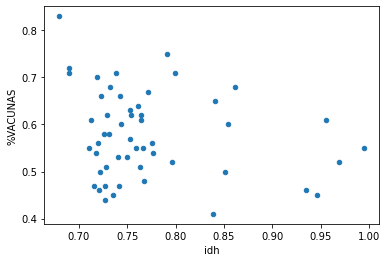

In [28]:
dfcomunas.plot.scatter(x='idh', y='%VACUNAS')

<AxesSubplot:xlabel='PROP 65+', ylabel='%VACUNAS'>

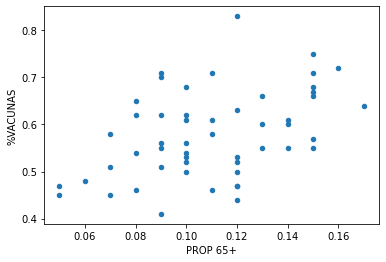

In [29]:
dfcomunas.plot.scatter(x='PROP 65+', y='%VACUNAS')

<AxesSubplot:xlabel='idh', ylabel='Comuna'>

<Figure size 1120x800 with 0 Axes>

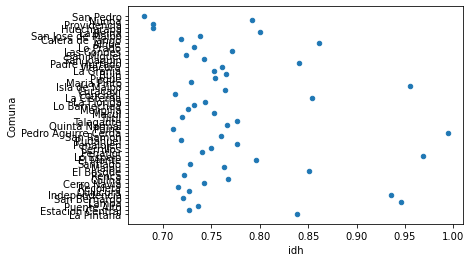

In [30]:
figure(figsize=(14, 10), dpi=80)
dfcomunas.plot.scatter(x='idh', y='Comuna')

Text(0.5, 1.0, 'Avances de vacunación, idh y proporción de población mayor a 65 por comuna de la Región Metropolitana')

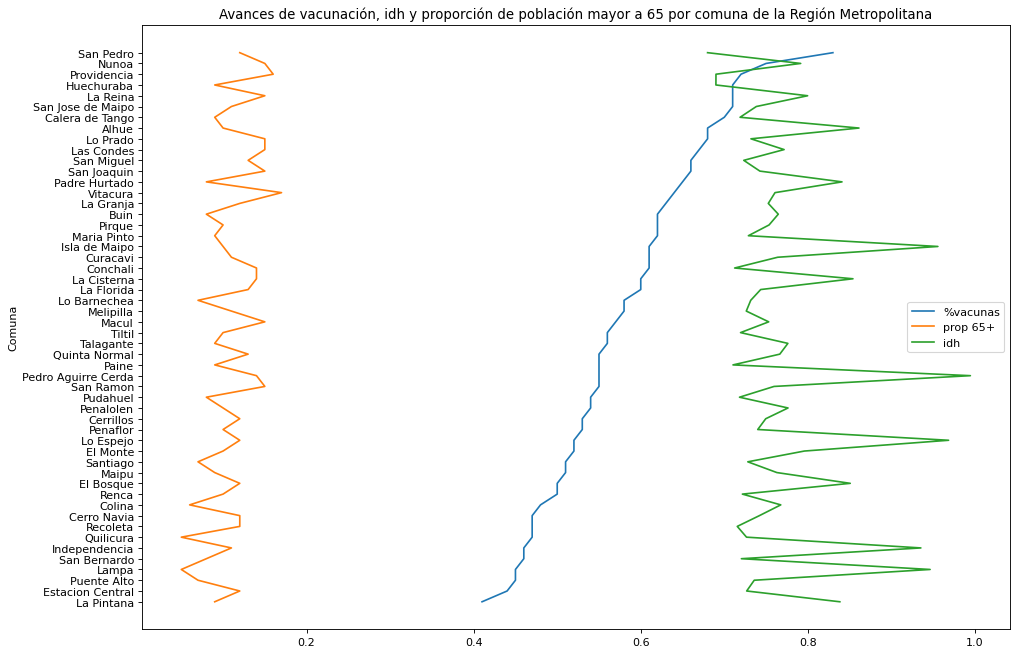

In [31]:
figure(figsize=(14, 10), dpi=80)
plt.plot(dfcomunas['%VACUNAS'],dfcomunas['Comuna'], label = '%vacunas')
plt.plot(dfcomunas['PROP 65+'],dfcomunas['Comuna'], label='prop 65+')
plt.plot(dfcomunas['idh'],dfcomunas['Comuna'], label= 'idh')

plt.legend(loc="right") 
plt.xlabel('')
plt.ylabel('Comuna')
plt.title('Avances de vacunación, idh y proporción de población mayor a 65 por comuna de la Región Metropolitana')